In [1]:
from data import *
from alg import * 
from util import *
import networkx as nx
import numpy as np


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVC

## Experiments on synthetic data (in-process approach)

In [2]:

T = 10	
num_data = 6000
seed = 12345
attr_target = "A"
has_exogeneous = True
unfair = nx.DiGraph()
unfair.add_edges_from([
	["A","D"]
	# ,["A","M"]
	]) 
acc_eps = {}
time_ave = {}

for name, clf in zip([
				"LR"
				# , "SVM"
				, "NN"
				,"RF"
				],[
					LogisticRegression (penalty='l2', solver='liblinear')
					# ,SVC (kernel='poly', gamma='auto', probability=True)
					,MLPClassifier(solver='adam', hidden_layer_sizes=(50, 50, 50, 50), max_iter=1000, random_state=42)
					,RandomForestClassifier(max_depth=5, min_samples_split=5)
					]):
	
	acc_eps[name] = np.array([])
	time_ave[name] = np.array([])
	for t in range(T):
		data = Data_chikahara(seed+t)
		data.gen_data(num_data)

		alg = Alg_dc(data,unfair,attr_target, 1, 0)	
		results = alg.run(clf,has_exogeneous)
		acc_eps[name] = np.append(acc_eps[name], results[0])
		time_ave[name] = np.append(time_ave[name], results[1])
plot_result(acc_eps,False,"result_acc_synth.tex")

## Experiments on misspecification

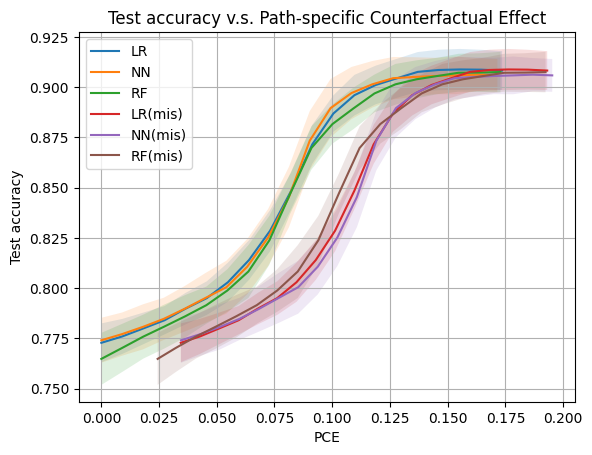

In [5]:
T = 10	# The number of datasets
has_exogeneous = True

num_data = 6000
seed = 12345
attr_target = "A"
unfair = nx.DiGraph()
unfair.add_edges_from([
	["A","D"]
	]) 

for name, clf in zip([
			"LR(mis)",
			# , "SVM(mis)"
			"NN(mis)",
			"RF(mis)"
			],[
				LogisticRegression (penalty='l2', solver='liblinear'),
				# ,SVC (kernel='poly', gamma='auto', probability=True)
				MLPClassifier(solver='adam', hidden_layer_sizes=(50, 50, 50, 50), max_iter=1000, random_state=42),
				RandomForestClassifier(max_depth=5, min_samples_split=5)
			]):
    
	acc_eps[name] = np.array([])	
	for t in range(T):		
		
		data = Data_chikahara(seed+t)
		data.gen_data(num_data)

		alg = Alg_dc_mis(data,unfair,attr_target, 1, 0)
		acc_eps[name] = np.append(acc_eps[name], alg.run(clf, has_exogeneous))

plot_result(acc_eps)

## Experiments on the Adult dataset compared to in-process approaches

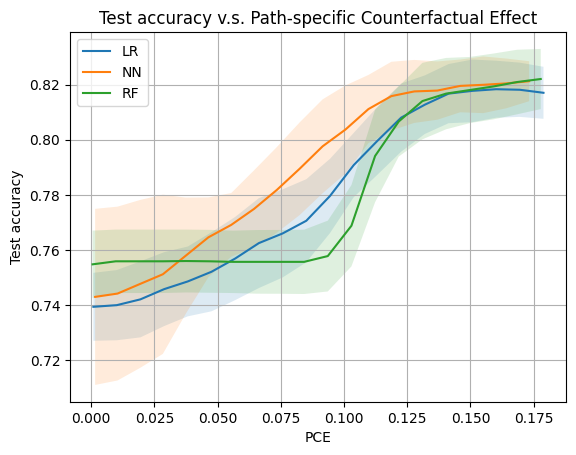

In [ ]:
file_graph = "../data/adult_c/adult_graph_chikahara.xml"

T=10
attr_target = "male"
features = ["male", "married", "higher_edu", "gov_jobs","age", "native_country"]
target = "high_income"
unfair = nx.DiGraph()
unfair.add_edges_from([
	["male", "married"]
	, ["married", "higher_edu"]
	, ["higher_edu", "gov_jobs"]
	, ["married", "gov_jobs"]
	]) # excluding paths to high_income
seed = 12345

acc_eps={}; time_ave={}

for name, clf in zip([
			"LR",
			# , "SVM"
			"NN",
			"RF"
			],[
				LogisticRegression (penalty='l2', solver='liblinear'),
				# ,SVC (kernel='poly', gamma='auto', probability=True)
				MLPClassifier(solver='adam', hidden_layer_sizes=(50, 50, 50, 50), max_iter=1000, random_state=42),
				RandomForestClassifier(max_depth=5, min_samples_split=5)
				]):
	acc_eps[name] = np.array([])	
	time_ave[name] = np.array([])	
	for t in range(T):
		
		file_train = f"../data/adult_c/{t}_adult_binary_train.csv"
		file_test = f"../data/adult_c/{t}_adult_binary_test.csv"
		data = Data_Adult_Chikahara(seed)
		data.gen_data(file_graph, file_train, file_test, features, target)

		alg = Alg_dc(data,unfair,attr_target, 1, 0)
		results = alg.run(clf)
		acc_eps[name] = np.append(acc_eps[name], results[0])
		time_ave[name] = np.append(time_ave[name], results[1])
plot_result(acc_eps)

## experiments on German dataset (compared to in-process approach)

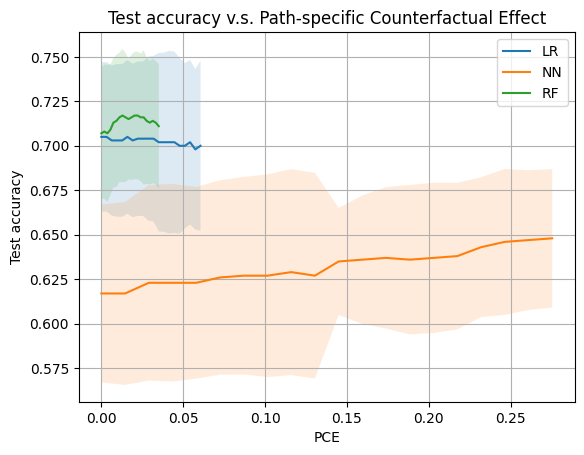

In [16]:
T = 10		# The number of datasets
# num_data = 6000
seed = 1234
attr_target = "Sex"
features = ["Sex","Age","Job","Housing","Saving accounts","Checking account","Credit amount","Duration","Purpose"]
target = "Risk"
unfair = nx.DiGraph()
unfair.add_edges_from([
	["Sex","Saving accounts"],["Sex","Checking account"],["Sex","Housing"],["Sex","Job"]
	])
acc_eps_german = {}
time_ave_german = {}

for name, clf in zip([
				"LR"
				# , "SVM"
				, "NN"
				, "RF"
				],[
					LogisticRegression (penalty='l2', solver='liblinear')
					# ,SVC (kernel='poly', gamma='auto', probability=True)
					,MLPClassifier(solver='adam', hidden_layer_sizes=(100,100,100,100), max_iter=1000, random_state=42)
					,RandomForestClassifier(max_depth=5, min_samples_split=10)
					]):
	
	acc_eps_german[name] = np.array([])
	time_ave_german[name] = np.array([])
	for t in range(T):
		file_train = f"../data/german_c/{t}_german_train.csv"
		file_test  = f"../data/german_c/{t}_german_test.csv"

		data = Data_German(seed + t)
		data.create_graph()
		data.read_data(file_train, file_test, features, target)
		
		alg = Alg_dc(data,unfair,attr_target, 1, 0)
		results = alg.run(clf)
		acc_eps_german[name] = np.append(acc_eps_german[name], results[0])
		time_ave_german[name] = np.append(time_ave_german[name], results[1])
plot_result(acc_eps_german,True,"result_acc_synth.tex")

## Experiments on the synthetic dataset (Wu version)

In [ ]:

attr_target = "S"
features = ["A","S","N","M"]
unfair = nx.DiGraph()
unfair.add_edges_from([
	["S", "N"]
	, ["S", "M"]
	]) # excluding paths to Y
seed = 12345


T=10
acc_eps = {}
time_synth_wu = {}
# alg = Alg_dc(data,unfair,attr_target, 1, 0)
for name, clf in zip([
			"LR"
			, "SVM"
			# ,"RF"
			],[
				LogisticRegression (penalty='l2', solver='liblinear')
				,SVC (kernel='poly', gamma='auto', probability=True)
				# ,RandomForestClassifier(max_depth=5, min_samples_split=5)
				]):
	acc_eps[name] = np.array([])
	time_synth_wu[name] = np.array([])
	for t in range(T):
		file_train = f"../data/synth_w/synthetic_train_{t}.txt"
		file_test  = f"../data/synth_w/synthetic_test_{t}.txt"
		data = Data_Synth_Wu(seed)
		data.gen_data(file_train, file_test, features, "Y")
		alg = Alg_dc(data,unfair,attr_target, 1, 0)
		result = alg.run(clf)
		acc_eps[name] = np.append(acc_eps[name], result[0])
		time_synth_wu[name] = np.append(time_synth_wu[name], result[1])
plot_result(acc_eps)

## Experiments on the Adult dataset (Wu version)

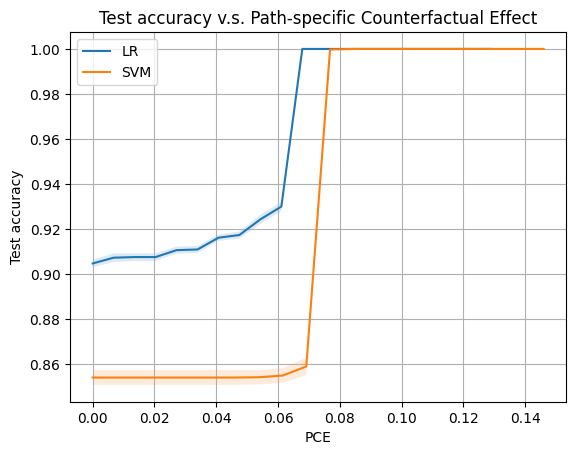

{'LR': array([{0.13047900005786822: 0.0013439655303955078, 0.12361168426534884: 0.04361701011657715, 0.11674436847282946: 0.001149892807006836, 0.10987705268031007: 0.0013031959533691406, 0.10300973688779068: 0.0010287761688232422, 0.09614242109527132: 0.0010721683502197266, 0.08927510530275193: 0.0010251998901367188, 0.08240778951023256: 0.001069784164428711, 0.07554047371771316: 0.0010161399841308594, 0.06867315792519381: 0.0010609626770019531, 0.06180584213267442: 0.0010221004486083984, 0.05493852634015504: 0.0010907649993896484, 0.04807121054763566: 0.0010442733764648438, 0.041203894755116294: 0.0010809898376464844, 0.034336578962596905: 0.0010390281677246094, 0.027469263170077515: 0.0010879039764404297, 0.020601947377558136: 0.0010449886322021484, 0.013734631585038766: 0.001093149185180664, 0.00686731579251938: 0.001035928726196289, 7.18717235778496e-18: 0.0010790824890136719},
       {0.12936202884362694: 0.028271913528442383, 0.12255350100975183: 0.001276254653930664, 0.11574497

In [ ]:

acc_eps_wu_adult = {}
time_eps_wu_adult = {}
attr_target = "sex"
unfair = nx.DiGraph()
unfair.add_edges_from([
	["sex", "marital-status"]
	, ["marital-status", "hours"]
	, ["marital-status", "workclass"]
	, ["workclass", "hours"]
	]) # excluding income
seed = 12345
file_graph = "../data/adult_w/adult_graph_wu.xml"

T=10
# alg = Alg_dc(data,unfair,attr_target, 1, 0)
for name, clf in zip([
			"LR"
			, "SVM"
			# ,"RF"
			],[
				LogisticRegression (penalty='l2', solver='liblinear')
				,SVC (kernel='poly', gamma='auto', probability=True)
				# ,RandomForestClassifier(max_depth=5, min_samples_split=5)
				]):
	acc_eps_wu_adult[name] = np.array([])
	time_eps_wu_adult[name] = np.array([])
	for t in range(T):
		
		file_train = f"../data/adult_w/adult_train_{t}.txt"
		file_test  = f"../data/adult_w/adult_test_{t}.txt"
		data = Data_Adult_Wu(seed)
		data.gen_data(file_graph, file_train, file_test)
		alg = Alg_dc(data,unfair,attr_target, 1, 0)
		result = alg.run(clf)
		acc_eps_wu_adult[name] = np.append(acc_eps_wu_adult[name], result[0])
		time_eps_wu_adult[name] = np.append(time_eps_wu_adult[name], result[1])
plot_result(acc_eps_wu_adult)

## Experiments on Remove algorithm(Synthetic)

In [11]:
T = 10	# The number of datasets
num_data = 6000
seed = 12345
attr_target = "A"
unfair = nx.DiGraph()
unfair.add_edges_from([
	["A","D"]
	]) 
acc_eps = {}
runtime = {}

for name, clf in zip([
				"LR"
				# , "SVM"
				, "NN"
				,"RF"
				],[
					LogisticRegression (penalty='l2', solver='liblinear')
					# ,SVC (kernel='poly', gamma='auto', probability=True)
					,MLPClassifier(solver='adam', hidden_layer_sizes=(50, 50, 50, 50), max_iter=1000, random_state=42)
					,RandomForestClassifier(max_depth=5, min_samples_split=5)
					]):
	
	acc_eps[name] = np.array([])
	runtime[name] = np.array([])
	for t in range(T):
		data = Data_chikahara(seed+t)
		data.gen_data(num_data)
		alg = Alg_remove(data,unfair,attr_target, 1, 0)	
		result = alg.run(clf,"")
		acc_eps[name] = np.append(acc_eps[name], result[0])
		runtime[name] = np.append(runtime[name], result[1])

	print(name, "mean accuracy", np.mean(acc_eps[name]), "error", np.std(acc_eps[name]))    

LR mean accuracy 0.7468 error 0.005035871324805674
NN mean accuracy 0.7415 error 0.005714017850864666
RF mean accuracy 0.7383 error 0.008173738434767786


## Experiments on Remove algorithm(Adult)

In [8]:
file_graph = "../data/adult_c/adult_graph_chikahara.xml"

T=1
attr_target = "male"
features = ["male", "married", "higher_edu", "gov_jobs","age", "native_country"]
target = "high_income"
unfair = nx.DiGraph()
unfair.add_edges_from([
	["male", "married"]
	, ["married", "higher_edu"]
	, ["higher_edu", "gov_jobs"]
	, ["married", "gov_jobs"]
	]) # excluding paths to high_income
seed = 12345

acc_eps={}
runtime = {}

for name, clf in zip([
			"LR",
			# , "SVM"
			"NN",
			"RF"
			],[
				LogisticRegression (penalty='l2', solver='liblinear'),
				# ,SVC (kernel='poly', gamma='auto', probability=True)
				MLPClassifier(solver='adam', hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42),
				RandomForestClassifier(max_depth=5, min_samples_split=5)
				]):
	acc_eps[name] = np.array([])
	runtime[name] = np.array([])
	for t in range(T):
		
		file_train = f"../data/adult_c/{t}_adult_binary_train.csv"
		file_test = f"../data/adult_c/{t}_adult_binary_test.csv"
		data = Data_Adult_Chikahara(seed)
		data.gen_data(file_graph, file_train, file_test, features, target)

		alg = Alg_remove(data,unfair,attr_target, 1, 0)
		result = alg.run(clf,target)
		acc_eps[name] = np.append(acc_eps[name], result[0])
		runtime[name] = np.append(runtime[name], result[1])

	print(name, "mean accuracy", np.mean(acc_eps[name]), "error", np.std(acc_eps[name]))

LR mean accuracy 0.732 error 0.0
NN mean accuracy 0.744 error 0.0
RF mean accuracy 0.744 error 0.0


## German dataset

In [12]:
T = 10		# The number of datasets
# num_data = 6000
seed = 1234
attr_target = "Sex"
features = ["Sex","Age","Job","Housing","Saving accounts","Checking account","Credit amount","Duration","Purpose"]
target = "Risk"
unfair = nx.DiGraph()
unfair.add_edges_from([
	["Sex","Saving accounts"],["Sex","Checking account"],["Sex","Housing"],["Sex","Job"]
	])
acc_eps_german = {}
time_ave_german = {}

for name, clf in zip([
				"LR"
				# , "SVM"
				, "NN"
				, "RF"
				],[
					LogisticRegression (penalty='l2', solver='liblinear')
					# ,SVC (kernel='poly', gamma='auto', probability=True)
					,MLPClassifier(solver='adam', hidden_layer_sizes=(100,100,100,100), max_iter=1000, random_state=42)
					,RandomForestClassifier(max_depth=5, min_samples_split=10)
					]):
	
	acc_eps_german[name] = np.array([])
	time_ave_german[name] = np.array([])
	for t in range(T):
		file_train = f"../data/german_c/{t}_german_train.csv"
		file_test  = f"../data/german_c/{t}_german_test.csv"

		data = Data_German(seed + t)
		data.create_graph()
		data.read_data(file_train, file_test, features, target)

		alg = Alg_remove(data,unfair,attr_target, 1, 0)	
		results = alg.run(clf,target)
		acc_eps_german[name] = np.append(acc_eps_german[name], results[0])
		time_ave_german[name] = np.append(time_ave_german[name], results[1])
	
	print(name, "mean accuracy", np.mean(acc_eps_german[name]), "error", np.std(acc_eps_german[name]))

LR mean accuracy 0.703 error 0.03287856444554718
NN mean accuracy 0.6260000000000001 error 0.047791212581394106
RF mean accuracy 0.704 error 0.033823069050575506
